In [10]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from e6dataflow.datamodel import load_datamodel, get_datamodel
from e6dataflow.tools.fittools import e6_fit
from scipy.optimize import curve_fit
import colorsys
import pickle


3


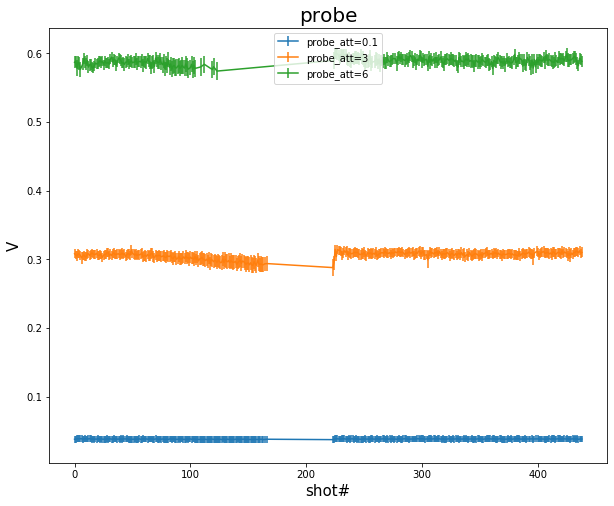

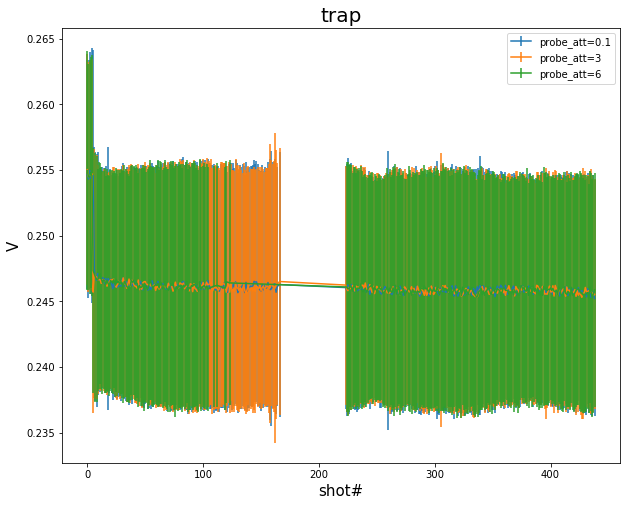

In [11]:
with open('scope_dict.pkl', 'rb') as f:
    scope_dict = pickle.load(f)
    
probe_avg=scope_dict["probe_avg"]
num_shots = len(probe_avg)
probe_sigma=scope_dict["probe_sigma"]
trap_avg=scope_dict["trap_avg"]
trap_sigma=scope_dict["trap_sigma"]
probe_avg_array=probe_avg.reshape(num_shots//3,3).T
probe_sigma_array=probe_sigma.reshape(num_shots//3,3).T
trap_avg_array=trap_avg.reshape(num_shots//3,3).T
trap_sigma_array=trap_sigma.reshape(num_shots//3,3).T

scope_dict["probe_avg"]=probe_avg_array
scope_dict["probe_sigma"]=probe_sigma_array
scope_dict["trap_avg"]=trap_avg_array
scope_dict["trap_sigma"]=trap_sigma_array

probe_att_list=[0.1,3,6]
print(len(probe_avg_array))
shot_list = np.array(range(num_shots//3))
mask = np.ones((3,num_shots//3), dtype=bool)
for ii in range(3):
    mask[ii] = np.logical_and(np.logical_and(np.logical_and(probe_avg_array[ii]>0.024, probe_sigma_array[ii] <0.013),\
                                            trap_sigma_array[ii] <0.012), trap_avg_array[ii]>0.2)

plt.figure(figsize=(10,8))
plt.title('probe', fontsize=20)
plt.xlabel('shot#', fontsize=15)
plt.ylabel('V', fontsize=15)
for probe_att_counter, probe_att in enumerate(probe_att_list):
    plt.errorbar(shot_list[mask[probe_att_counter]], probe_avg_array[probe_att_counter][mask[probe_att_counter]],\
                yerr = probe_sigma_array[probe_att_counter][mask[probe_att_counter]], label= f'probe_att={probe_att}')
plt.legend()


plt.figure(figsize=(10,8))
plt.title('trap', fontsize=20)
plt.xlabel('shot#', fontsize=15)
plt.ylabel('V', fontsize=15)
for probe_att_counter, probe_att in enumerate(probe_att_list):
    plt.errorbar(shot_list[mask[probe_att_counter]], trap_avg_array[probe_att_counter][mask[probe_att_counter]],\
                yerr = trap_sigma_array[probe_att_counter][mask[probe_att_counter]], label= f'probe_att={probe_att}')
plt.legend()

In [12]:
### Load datamodel from .p file
run_name = 'run1_probe'

datamodel = load_datamodel(datamodel_path=Path.cwd(), run_name=run_name)

Loading datamodel from Y:\expdata-e6\analysis\2021\03\15\run1_probe\run1_probe-datamodel.p


In [13]:
### Information about run:
### Note that molasses intensity is less than 5 for the first two frames,
### so better not use mol_freq = 4.5 and 5 for the 1/delta^2 fit!

tweezer_freq_list = [100,102,104,106,108,110,112,114,116,118,120]
num_tweezers = len(tweezer_freq_list)

probe_att_list = [0.1,3,6]
pzt_para_list = [5.5,5.5,6,6.5,7,7.5,8,8.5,9,9.5]

num_points = datamodel.num_points #len(pzt_para_list) * len(probe_att_list)


mol_freq_list = [6]
num_frames = len(pzt_para_list) + 3

num_shots = datamodel.num_shots

num_loops = num_shots // num_points

print(num_points,'points')
print(num_frames,'frames')
print(num_tweezers,'tweezers')
print(num_shots,'shots')
print(num_loops,'complete loops')


t_exposure = 500

3 points
13 frames
11 tweezers
1317 shots
439 complete loops


In [14]:
counts_array = np.zeros((num_frames,len(probe_att_list),len(tweezer_freq_list),num_loops))

for point in range(num_points):
    probe_att_counter = point
    for frame_num in range(num_frames):
        for twz_counter in range(num_tweezers):
            counts_array[frame_num,probe_att_counter,twz_counter,:]=\
                datamodel.get_data_by_point(f'frame-{frame_num:02d}_tweezer-{twz_counter:02d}_counts',point,\
                                           shots=range(num_loops*num_points))
            
            
            
print(counts_array.shape)

good_array = np.zeros((len(probe_att_list),len(tweezer_freq_list),num_loops), dtype=bool)
num_complete_shots = int(num_points*(num_shots//num_points))
for tweezer_counter in range(num_tweezers):
    for shot in range(num_complete_shots):
        point = shot % num_points
        loop = shot // num_points
        probe_att_counter = point 
        good_array[probe_att_counter, tweezer_counter, loop] = np.logical_and(np.logical_and(np.logical_and(\
                                            probe_avg[shot]>0.024, probe_sigma[shot] <0.013),\
                                            trap_sigma[shot] <0.012), trap_avg[shot] >0.2)
print(good_array.shape)

(13, 3, 11, 439)
(3, 11, 439)


c:\python37-32\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
c:\python37-32\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater
c:\python37-32\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
c:\python37-32\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice
c:\python37-32\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: Mean of empty slice
c:\python37-32\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: Mean of empty slice
c:\python37-32\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in greater
c:\python37-32\lib\site-packages\ipykernel_launcher.py:101: RuntimeWarning: Mean of empty slice
c:\python37-32\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: Mean of empty slice


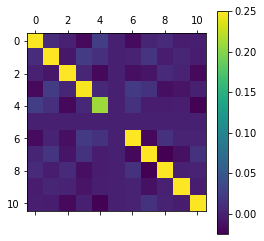

mean_in_theory:5.5, std_in_theory:1.6583123951777
mean:4.710706150341686, std:1.568670839579237
[0, 1]
[1, 5]
[2, 28]
[3, 68]
[4, 96]
[5, 100]
[6, 80]
[7, 52]
[8, 7]
[9, 1]
[10, 1]
[11, 0]


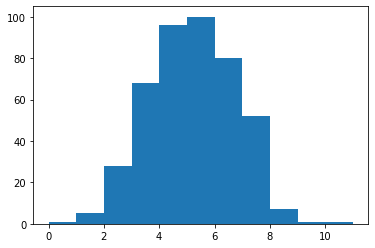

In [15]:
show_plot = False
# zeropeakHWFMper = 1.5
roi_area = 20*12
zeropeakHWFMper = 3
num_avg = 20 # number of loops to put in moving average

# Calculate cav_brightness and cav_fidelity for every shot!! 

cav_brightness = np.zeros((len(pzt_para_list),len(probe_att_list),len(tweezer_freq_list),num_loops))
cav_fidelity = np.zeros((len(pzt_para_list),len(probe_att_list),len(tweezer_freq_list),num_loops))
cav_brightness_mov_avg = np.zeros((len(pzt_para_list),len(probe_att_list),len(tweezer_freq_list),num_loops))
cav_brightness_mov_sigma = np.zeros((len(pzt_para_list),len(probe_att_list),len(tweezer_freq_list),num_loops))
cav_fidelity_mov_avg = np.zeros((len(pzt_para_list),len(probe_att_list),len(tweezer_freq_list),num_loops))
cav_fidelity_mov_sigma = np.zeros((len(pzt_para_list),len(probe_att_list),len(tweezer_freq_list),num_loops))
has_atom = np.zeros((len(pzt_para_list),len(probe_att_list),len(tweezer_freq_list),num_loops))
atom_number = np.zeros((len(pzt_para_list),len(probe_att_list),num_loops))



ref_counts = counts_array[num_frames-2,:,:,:]
ref_sigma = np.nanstd(ref_counts,-1)
ref_mean = np.nanmean(ref_counts,-1)
throw_threshold = ref_mean + 3 * ref_sigma
throw_threshold = np.repeat(throw_threshold[:,:,np.newaxis], num_loops, axis=2)
mask = np.less(ref_counts, throw_threshold, where=~np.isnan(ref_counts))
ref_counts = np.where(mask, ref_counts, np.nan)
base = np.nanmean(ref_counts,-1)

upper_threshold = base + 1.2 * zeropeakHWFMper * roi_area

base = np.repeat(base[:,:,np.newaxis],num_loops,axis=2)
upper_threshold = np.repeat(upper_threshold[:,:,np.newaxis], num_loops, axis=2)

counts_1 = counts_array[0,:,:,:]


for frame_num in range(len(pzt_para_list)):
    pzt_para = pzt_para_list[frame_num]
    counts = counts_array[frame_num,:,:,:]
    counts_next = counts_array[frame_num+1,:,:,:]
    mask = counts_next > upper_threshold
    counts_post_selected = np.where(mask, counts, np.nan)

    atomcenter = np.nanmean(counts_post_selected,-1)

    brightness = counts_post_selected - base ## should this be ref_counts (per shot) or base (averaged)
    brightness_sigma = np.nanstd(brightness,-1)
    brightness_mean = np.nanmean(brightness,-1)

    lower_threshold = atomcenter - 3 * brightness_sigma
    lower_threshold = np.repeat(lower_threshold[:,:,np.newaxis], num_loops, axis=2)

    # mask = counts_post_selected > lower_threshold ## getting warning about NaN. 

    mask = np.greater(counts_post_selected, lower_threshold, where=~np.isnan(counts_post_selected))
    
    counts_postpost_selected = np.where(mask, counts_post_selected, np.nan)
#     print(counts_postpost_selected)
    counts_postpostpost_selected = np.where(good_array, counts_postpost_selected, np.nan)
    
    
    for probe_att_counter, probe_att in enumerate(probe_att_list):
        if show_plot == True:
            fig, ax = plt.subplots(2,num_tweezers, figsize=(30, 6))
            fig.suptitle(f'counts histogram - mol_freq={mol_freq} - probe_att={probe_att} - frame_{frame_num + 1}')

            for tweezer_freq_counter, tweezer_freq in enumerate(tweezer_freq_list):
#                     print([tweezer_freq_counter, tweezer_freq])
                bins=50
                ax[0,tweezer_freq_counter].hist(counts_1[probe_att_counter,tweezer_freq_counter,:], alpha=0.15, color='yellow', bins=bins)
                ax[0,tweezer_freq_counter].hist(ref_counts[probe_att_counter,tweezer_freq_counter,:], alpha=0.3, color='b', bins=bins)
                n, bins, patches = \
                ax[0,tweezer_freq_counter].hist(counts[probe_att_counter,tweezer_freq_counter,:], alpha=0.6, color='r', bins=bins)
                ax[0,tweezer_freq_counter].hist(counts_postpostpost_selected[probe_att_counter,tweezer_freq_counter,:], alpha=0.5, color='black', bins=bins)
                ax[0,tweezer_freq_counter].legend(['counts_1', 'counts_ref', f'counts_{frame_num + 1}', f'counts_{frame_num + 1}(post selected)'])
                ax[0,tweezer_freq_counter].axvline(upper_threshold[probe_att_counter,tweezer_freq_counter,0], linestyle='--', color='k')
#                     ax[0].axvline(lower_threshold, linestyle='--', color='b')

                scatter_range = range(num_loops)
                ax[1,tweezer_freq_counter].scatter(scatter_range, counts[probe_att_counter,tweezer_freq_counter,:], color='r')
                ax[1,tweezer_freq_counter].scatter(scatter_range, ref_counts[probe_att_counter,tweezer_freq_counter,:], color='b')
                ax[1,tweezer_freq_counter].set_xlabel(f'loop# - tweezer{tweezer_freq}')
                ax[1,tweezer_freq_counter].set_ylabel('photon counts')
#                     ax[1,tweezer_freq_counter].legend(['counts', 'counts_ref'])
#                 plt.savefig(Path(save_path, f'mol_freq={mol_freq} - pzt_para={pzt_para_counter} - tweezer={tweezer_counter} - frame_2_pre_selected.png'))
            plt.show()
    
    
    has_atom[frame_num,:,:,:] = ~np.isnan(counts_postpost_selected)
    atom_number[frame_num,:,:] = np.count_nonzero(has_atom[frame_num,:,:,:], axis = 1)
    atomcenter = np.nanmean(counts_postpostpost_selected,-1)
    brightness = counts_postpostpost_selected - base ## should this be ref_counts (per shot) or base (averaged)
    brightness_mean = np.nanmean(brightness,-1)
    brightness_sigma = np.nanstd(brightness,-1)
    
#     lower_threshold = atomcenter - 3 * brightness_sigma

    cav_brightness[frame_num,:,:,:] = brightness # num_frames x 
    cav_fidelity[frame_num,:,:,:] = np.where(counts>upper_threshold,1,0)

cav_brightness_mean = np.nanmean(cav_brightness,-1)
cav_brightness_sigma = np.nanstd(cav_brightness,-1)
cav_fidelity_mean = np.nanmean(cav_fidelity,-1)
cav_fidelity_sigma = np.sqrt(num_loops*cav_fidelity_mean*(1-cav_fidelity_mean))/(num_loops)
for loop in range(num_loops):
    start_temp = np.maximum(np.ceil(loop-num_avg/2).astype(int),0)
    end_temp = np.minimum(np.floor(loop+num_avg/2).astype(int), num_loops)
    cav_brightness_mov_avg[:,:,:,loop] = np.nanmean(cav_brightness[:,:,:,start_temp:end_temp],-1)
    cav_brightness_mov_sigma[:,:,:,loop] = np.nanstd(cav_brightness[:,:,:,start_temp:end_temp],-1)
    cav_fidelity_mov_avg[:,:,:,loop] = np.nanmean(cav_fidelity[:,:,:,start_temp:end_temp],-1)
    cav_fidelity_mov_sigma[:,:,:,loop] = np.nanstd(cav_fidelity[:,:,:,start_temp:end_temp],-1)

covariance_matrix = np.zeros((num_tweezers,num_tweezers))
for ii in range(num_tweezers):
    for jj in range(num_tweezers):
        covariance_matrix[ii,jj] = np.cov(has_atom[0,0,ii,:],has_atom[0,0,jj,:])[0,1]
plt.matshow(covariance_matrix)
plt.colorbar()
plt.show()

bins=11
plt.hist(atom_number[0,0,:],bins=bins,range=(0,bins))
print(f"mean_in_theory:{num_tweezers/2}, std_in_theory:{np.sqrt(num_tweezers/4)}")
print(f"mean:{np.mean(atom_number[0,0,:])}, std:{np.std(atom_number[0,0,:])}")
for number_atom in range(num_tweezers+1):
    print([number_atom, np.count_nonzero(atom_number[0,0,:]==number_atom)])

In [19]:
print(num_tweezers)

11


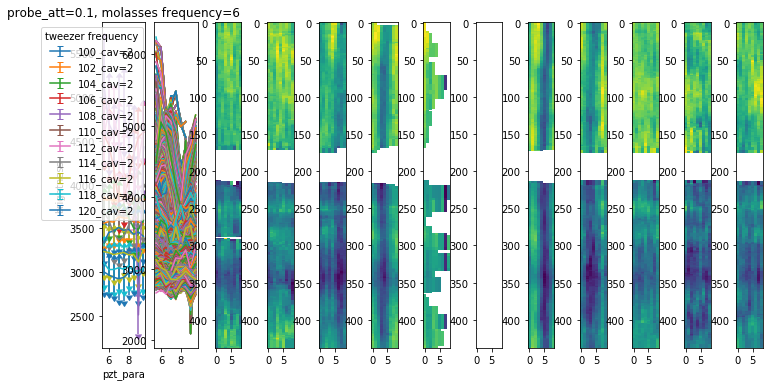

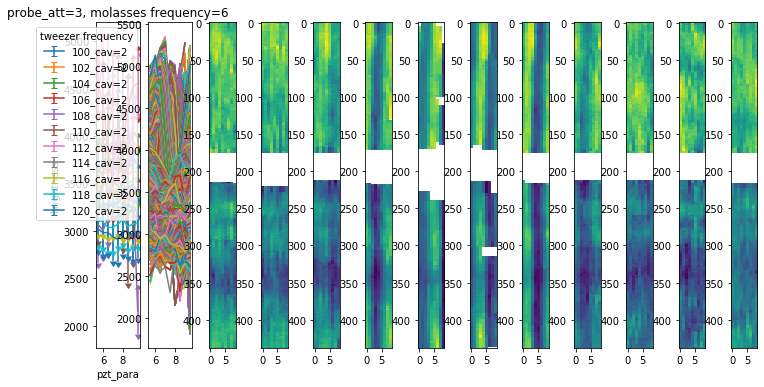

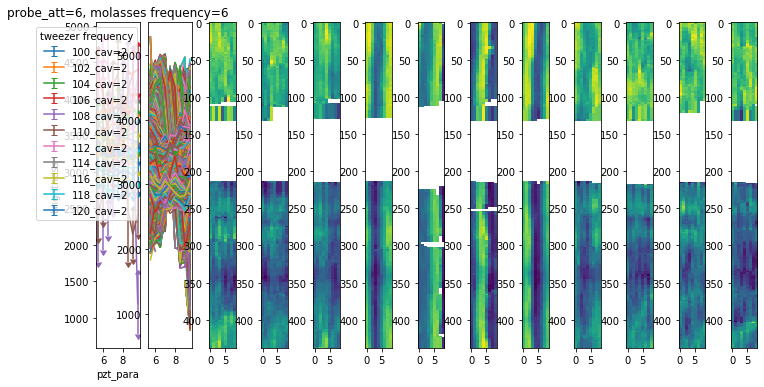

In [20]:
# PICK ONE probe_att (0.1) and molasses freq and tweezer?, plot brightness vs pzt_para
# GRID: probe_att & molasses freq (8X4=24 rows): brightness
# PLOT: brightness vs pzt_para; survival prob vs pzt_para; for all tweezers. 

# num_tweezers = 2



for probe_att_counter in range(len(probe_att_list)):
    fig, axs = plt.subplots(1, 2+num_tweezers,  figsize=(12, 6))
    axs[0].set_xlabel('pzt_para')
    axs[0].set_ylabel('brightness')
    probe_att = probe_att_list[probe_att_counter]
    
    axs[0].set_title(f'probe_att={probe_att}, molasses frequency={mol_freq_list[0]}')        
    axs[0].tick_params(axis='y')
    for tweezer_counter in range(num_tweezers):
        axs[0].errorbar(np.array(pzt_para_list)[1:], cav_brightness_mean[1:, probe_att_counter, tweezer_counter], \
            yerr = cav_brightness_sigma[1:, probe_att_counter, tweezer_counter],  uplims=True, lolims=True, label= f'{tweezer_freq_list[tweezer_counter]}_cav=2')
        for loop in range(0,num_loops,1):
#                 axs[mol_counter,1].plot(np.array(pzt_para_list),np.nanmean(cav_brightness[mol_counter,probe_att_counter,:,tweezer_counter,loop:(loop+25)],1))
            axs[1].plot(np.array(pzt_para_list)[1:],cav_brightness_mov_avg[1:,probe_att_counter,tweezer_counter,loop])
        axs[2+tweezer_counter].imshow(np.transpose(cav_brightness_mov_avg[1:,probe_att_counter,tweezer_counter,:]), aspect = 0.25)
    axs[0].legend(title='tweezer frequency', bbox_to_anchor=(1.05, 1), loc='upper right')
            

In [21]:
# using outside tweezer as reference:
# averaging brightness of last tweezer over all piezo positions for each mol freq and probe att. 
outside_tweezer_counter = 10
molasses_intensity_list = [0.97512614, 0.98709936, 0.96621564, 0.99082936, 1. ,        0.93898526,
0.9479187,  0.90025779, 0.89672007, 0.88659351, 0.85702366]

# not sure whether to avg all of these or not?
# maybe should just calc one for all? if the idea is it's outside the probe mode. 

# bg_brightness_mean = np.zeros(len(mol_freq_list))
# bg_brightness_sigma = np.zeros(len(mol_freq_list))
bg_brightness_mov_avg = np.zeros(num_loops)
bg_brightness_mov_sigma = np.zeros(num_loops)

cav_brightness_mov_avg_normalized = np.zeros((len(pzt_para_list),len(probe_att_list),len(tweezer_freq_list),num_loops))
# cav_brightness_mov_sigma_normalized = np.zeros((len(mol_freq_list),len(probe_att_list),len(pzt_para_list),len(tweezer_freq_list),num_loops))

bg_brightness_mean = np.nanmean(cav_brightness_mean[ :, :, outside_tweezer_counter])
bg_brightness_sigma = np.sqrt(np.nanmean(cav_brightness_sigma[:, :, outside_tweezer_counter]**2) \
            + np.nanmean((cav_brightness_mean[:, :, outside_tweezer_counter]-bg_brightness_mean)**2))
for loop in range(num_loops):
    bg_brightness_mov_avg[loop] = np.nanmean(cav_brightness_mov_avg[:, :, outside_tweezer_counter,loop])
    bg_brightness_mov_sigma[loop] = np.sqrt(np.nanmean(cav_brightness_mov_sigma[:, :, outside_tweezer_counter,loop]**2) \
            + np.nanmean((cav_brightness_mov_avg[:, :, outside_tweezer_counter,loop]-bg_brightness_mov_avg[loop])**2))
    for tweezer_counter in range(len(tweezer_freq_list)):
#                 print((bg_brightness_mov_avg[mol_counter, loop]/bg_brightness_mean[mol_counter]))
        cav_brightness_mov_avg_normalized[:, :, tweezer_counter, loop] = \
        cav_brightness_mov_avg[:, :, tweezer_counter, loop]/\
                (bg_brightness_mov_avg[loop]/bg_brightness_mean)*\
                (molasses_intensity_list[outside_tweezer_counter]/molasses_intensity_list[tweezer_counter])


bg_fidelity_mean = np.nanmean(cav_fidelity_mean[:, :, outside_tweezer_counter])
bg_fidelity_sigma = np.sqrt(np.nanmean(cav_fidelity_sigma[:, :, outside_tweezer_counter]**2) \
            + np.nanmean((cav_fidelity_mean[:, :, outside_tweezer_counter]-bg_fidelity_mean)**2))


c:\python37-32\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
c:\python37-32\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
c:\python37-32\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


In [32]:


loop_start = num_avg//2+1
loop_end = num_loops - num_avg//2-11
loop_start = 250
# loop_end = 95

shifted_pzt_paras = np.zeros((len(pzt_para_list),len(probe_att_list),len(tweezer_freq_list),num_loops))
shifted_pzt_para_simple = np.zeros((len(pzt_para_list),num_loops))

def func_cos(x, a, b, wavelength, xshift):
    return b + a * np.cos(4*np.pi/wavelength*(x+xshift))


y_mag = 1 #13.64
x_mag = 2/7.5


for tweezer_counter,tweezer_freq in enumerate(tweezer_freq_list[:]):
    for probe_att_counter, probe_att in enumerate(probe_att_list[:]):
        valid = ~(np.isnan(cav_brightness_mean[:,probe_att_counter,tweezer_counter]) |\
                  np.isnan(cav_brightness_sigma[:,probe_att_counter,tweezer_counter]))
        popt, pcov = curve_fit(func_cos, np.array(pzt_para_list)[valid],\
                       cav_brightness_mean[:,probe_att_counter,tweezer_counter][valid],\
                       sigma = cav_brightness_sigma[:,probe_att_counter,tweezer_counter][valid],\
                       p0=[1000, 4000, 7, 0], maxfev = 10000)

        a0, b0, wavelength0, xshift0 = popt
        def func_cos2(x, xshift, a):
            return b0 + a * np.cos(4*np.pi/wavelength0*(x+xshift)) 
        xshift = xshift0
        a = a0
        for loop in range(loop_start, loop_end):
            ba = cav_brightness_mov_avg_normalized[:,probe_att_counter,tweezer_counter,loop]
            pzt_list = np.array(pzt_para_list)[~np.isnan(ba)]
            ba_sig = cav_brightness_mov_sigma[:,probe_att_counter,tweezer_counter,loop][~np.isnan(ba)]
            ba = ba[~np.isnan(ba)]
            if len(ba)>1:
                popt, pcov = curve_fit(func_cos2, pzt_list,\
                                       ba,\
            #                            sigma = ba_sig,\
                                       p0=[xshift, a], maxfev = 10000)

                xshift = popt[0]

                shifted_pzt_paras[:,probe_att_counter,tweezer_counter,loop] \
                = np.array(pzt_para_list)+xshift-xshift0




ValueError: `ydata` must not be empty!

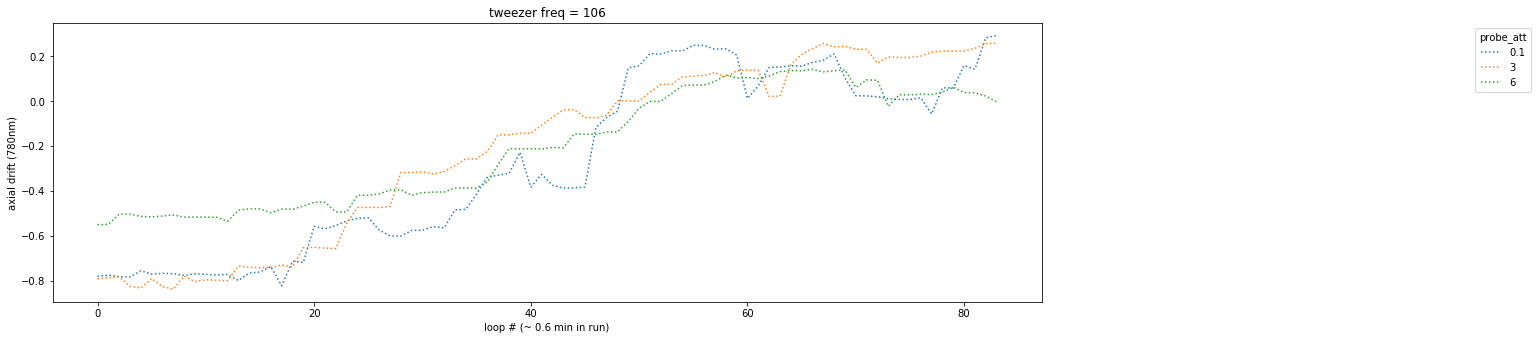

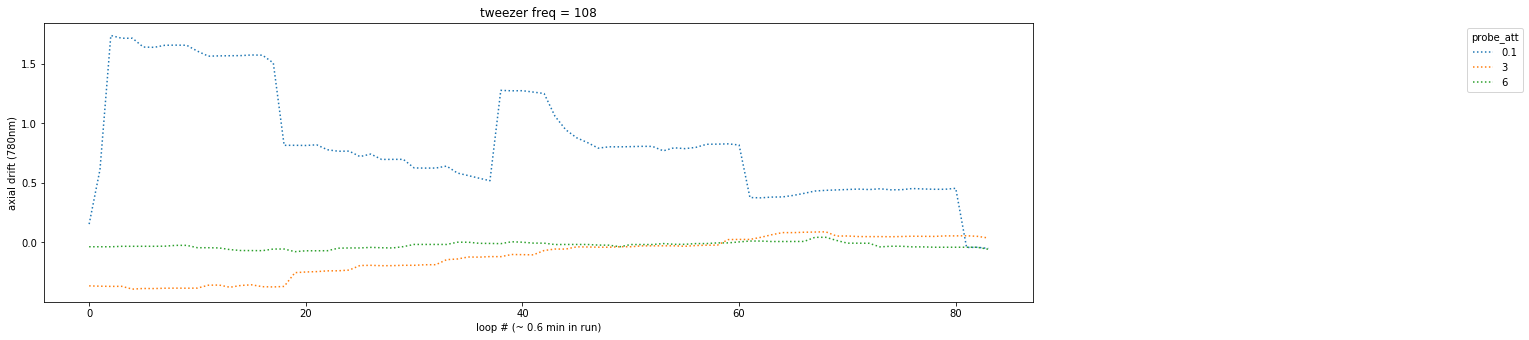

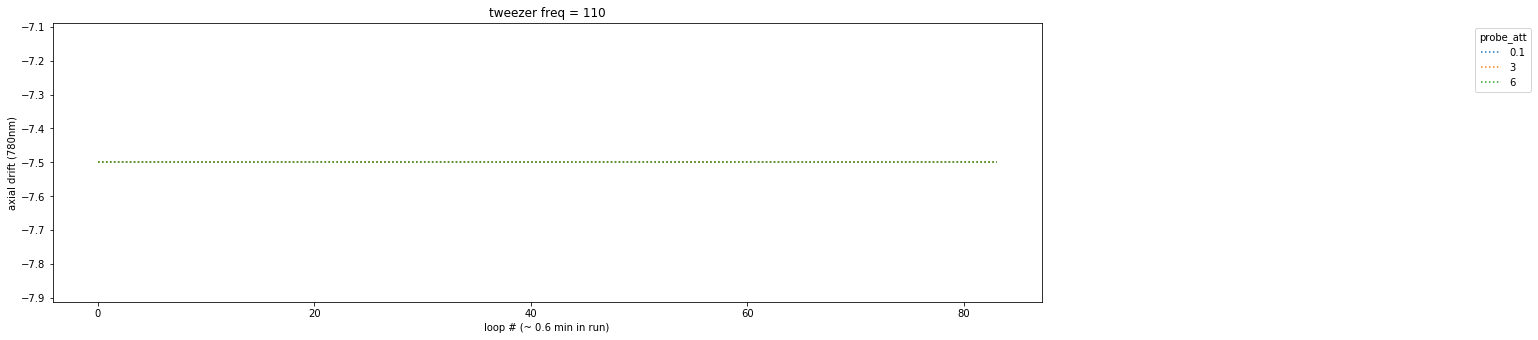

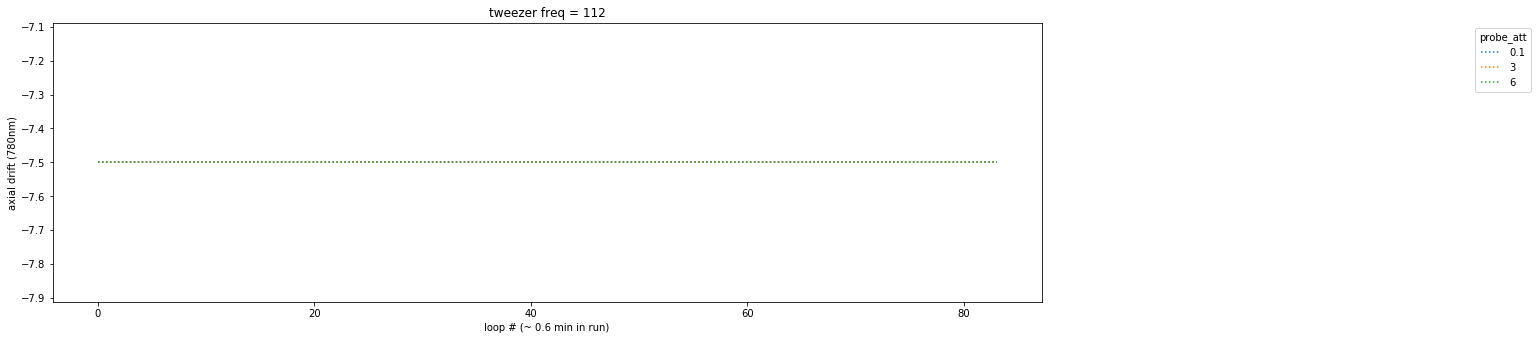

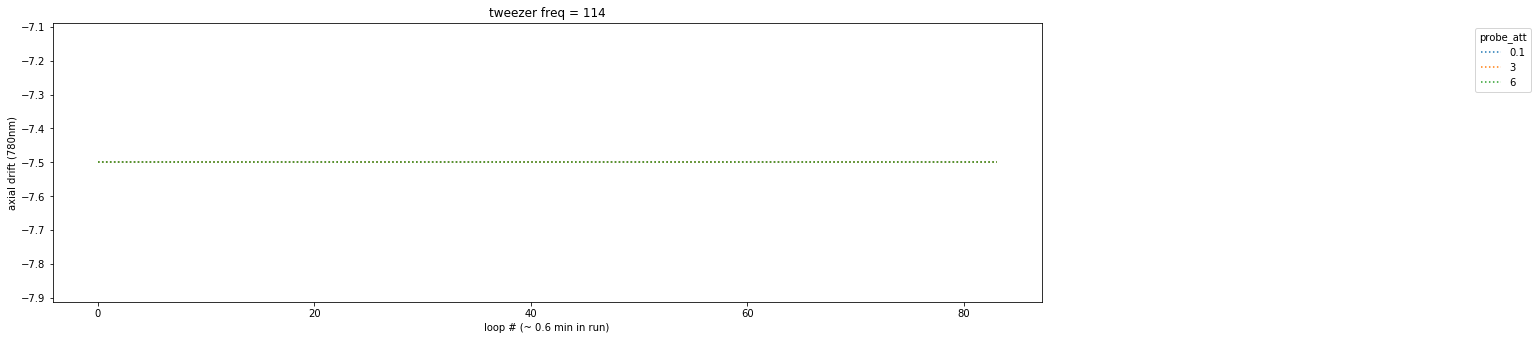

In [23]:

for tweezer_counter in range(3,8):
    fig, ax = plt.subplots(1,1,  figsize=(15, 5))
    fig.tight_layout(pad=3, w_pad=3, h_pad=4.0)
    for probe_att_counter in range(3):
        y_data = shifted_pzt_paras[5,probe_att_counter,tweezer_counter,loop_start:loop_end]-np.array(pzt_para_list)[5]
        ax.plot(y_data, label= f'{probe_att_list[probe_att_counter]}',ls=':')
#             ax[probe_att_counter].set_ylim([-1,1])
        ax.set_title(f'tweezer freq = {tweezer_freq_list[tweezer_counter]}')

        ax.set_xlabel(f'loop # (~ {(num_points*11/60):.1f} min in run)')
        ax.set_ylabel('axial drift (780nm)')

    ax.legend(title='probe_att', bbox_to_anchor=(1.5, 1), loc='upper right')
        
        


In [24]:

                
from scipy.signal import savgol_filter
center_tweezer_counter = 6

shifted_pzt_para_simple[:,loop_start:loop_end] = savgol_filter(shifted_pzt_paras[:,0,center_tweezer_counter,loop_start:loop_end], 15, 3)
for tweezer_counter,tweezer_freq in enumerate(tweezer_freq_list[:]):
    for probe_att_counter, probe_att in enumerate(probe_att_list[:]):
        shifted_pzt_paras[:,probe_att_counter,tweezer_counter,loop_start:loop_end] = shifted_pzt_para_simple[:,loop_start:loop_end]
            

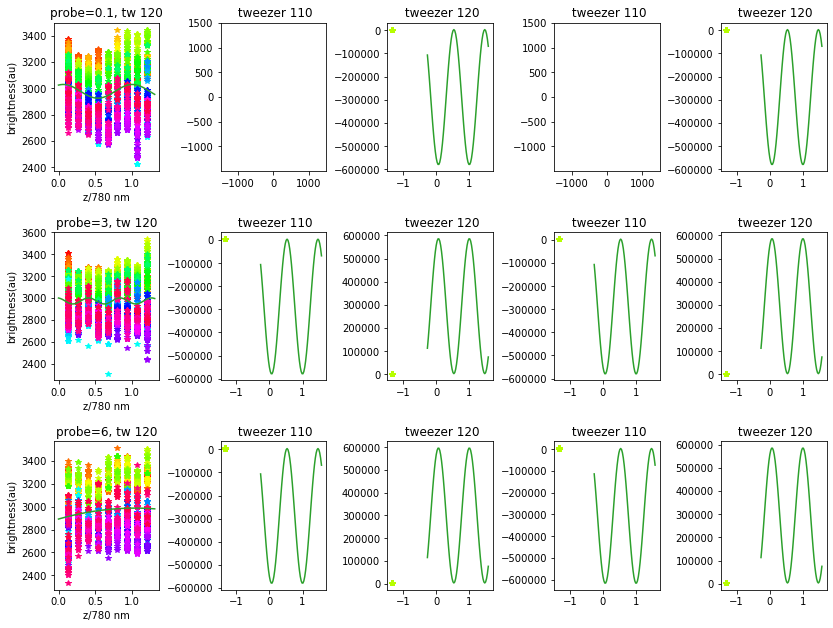

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colorsys

def func_cos(x, a, b, wavelength, xshift):
    return b + a * np.cos(4*np.pi/wavelength*(x+xshift))
y_mag = 1 #13.64
x_mag = 2/7.5


tweezer_select = [5,10]




fig, axs = plt.subplots(len(probe_att_list), 1+2*len(tweezer_select),  figsize=(12, 3*len(probe_att_list)))
fig.tight_layout(pad=3, w_pad=3, h_pad=4.0)
for tweezer_counter,tweezer_freq in enumerate(tweezer_freq_list[:]):
    for probe_att_counter, probe_att in enumerate(probe_att_list[:]):

        valid = ~(np.isnan(cav_brightness_mean[:,probe_att_counter,tweezer_counter]) |\
                  np.isnan(cav_brightness_sigma[:,probe_att_counter,tweezer_counter]))
        if np.count_nonzero(valid)>4:
            popt, pcov = curve_fit(func_cos, np.array(pzt_para_list)[valid],\
                           cav_brightness_mean[valid,probe_att_counter,tweezer_counter],\
                           sigma = cav_brightness_sigma[valid,probe_att_counter,tweezer_counter],\
                           p0=[1000, 4000, 7, 0], maxfev = 10000)

            a0, b0, wavelength0, xshift0 = popt

        def func_cos2(x, xshift):
            return b0 + a0 * np.cos(4*np.pi/wavelength0*(x+xshift)) 
    #     print('________________________')
        for loop in range(num_loops - num_avg +1 ):
            color = colorsys.hsv_to_rgb(loop/num_loops,1,1)
            if tweezer_counter == tweezer_select[1]:
#                     axs[probe_att_counter,0].plot(x_mag * (xx-5),y_mag * yy,'.', color =f'C{tweezer_counter:01d}',markersize=0.5)
                axs[probe_att_counter,0].plot(x_mag * (np.array(pzt_para_list)-5) ,\
                                             y_mag * cav_brightness_mov_avg[:,probe_att_counter,tweezer_counter,loop],\
                                             '*', label= f'{tweezer_freq_list[tweezer_counter]}', color = color);


        if tweezer_counter == tweezer_select[1]: 
            axs[probe_att_counter,0].set_xlabel('z/780 nm')
            axs[probe_att_counter,0].set_ylabel('brightness(au)')
            axs[probe_att_counter,0].set_title(f'probe={probe_att_list[probe_att_counter]}, tw {tweezer_freq}'\
#                f'| a0={a0:.2f}, b0={b0:.2f}'\
            );

            if np.count_nonzero(valid)>4:
                xx = np.arange(5,10,0.1)
                yy = func_cos(xx,a0,b0,wavelength0,xshift0)
                axs[probe_att_counter,0].plot(x_mag * (xx-5),y_mag * yy,'-', color ='C2')


        shifted_pzt = shifted_pzt_para_simple[:, loop_start:loop_end].flatten()

        cav_b = cav_brightness_mov_avg[:,probe_att_counter,tweezer_counter, loop_start:loop_end].flatten()
        cav_b_sigma = cav_brightness_mov_sigma[:,probe_att_counter,tweezer_counter, loop_start:loop_end].flatten()


        if np.count_nonzero(~np.isnan(cav_b))>4:
            popt, pcov = curve_fit(func_cos, shifted_pzt[~np.isnan(cav_b)],\
                           cav_b[~np.isnan(cav_b)],\
        #                    sigma = cav_b_sigma[~np.isnan(cav_b)],\
                           p0=[1000, 4000, 7, 0], maxfev = 100000)

            a0, b0, wavelength0, xshift0 = popt
            xx = np.arange(4,11,0.1)
            yy = func_cos(xx,a0,b0,wavelength0,xshift0)


        if (tweezer_counter in tweezer_select): 
            if np.count_nonzero(~np.isnan(cav_b))>4:
                axs[probe_att_counter, 1+tweezer_select.index(tweezer_counter)].plot(x_mag *(xx-5),y_mag*yy,'-', color ='C2')

            axs[probe_att_counter, 1+tweezer_select.index(tweezer_counter)].set_title(f' tweezer {tweezer_freq}'\
#                 f'a0={a0:.2f}, b0={b0:.2f}'\
                                                                                     );

#                 divider = make_axes_locatable(axs[probe_att_counter,1])
#                 cax = divider.append_axes('right', size='5%', pad=0.05)
#                 fig.colorbar(im, cax=cax, orientation='vertical')
            for loop in range(loop_start,loop_end):
                color = colorsys.hsv_to_rgb(loop/num_loops,1,1)
                axs[probe_att_counter, 1+tweezer_select.index(tweezer_counter)].plot(x_mag*(shifted_pzt_para_simple[:,loop]-5),\
                                                  y_mag*cav_brightness_mov_avg[:,probe_att_counter,tweezer_counter,loop],\
                                                  '*', color = color);



        cav_b = cav_brightness_mov_avg_normalized[:,probe_att_counter,tweezer_counter, loop_start:loop_end].flatten()
        cav_b_sigma = cav_brightness_mov_sigma[:,probe_att_counter,tweezer_counter, loop_start:loop_end].flatten()


        if np.count_nonzero(~np.isnan(cav_b))>4:
            popt, pcov = curve_fit(func_cos, shifted_pzt[~np.isnan(cav_b)],\
                           cav_b[~np.isnan(cav_b)],\
        #                    sigma = cav_b_sigma[~np.isnan(cav_b)],\
                           p0=[1000, 4000, 7, 0], maxfev = 100000)

            a0, b0, wavelength0, xshift0 = popt
            xx = np.arange(4,11,0.1)
            yy = func_cos(xx,a0,b0,wavelength0,xshift0)


        if (tweezer_counter in tweezer_select): 
            if np.count_nonzero(~np.isnan(cav_b))>4:
                axs[probe_att_counter, 3+tweezer_select.index(tweezer_counter)].plot(x_mag *(xx-5),y_mag*yy,'-', color ='C2')

            axs[probe_att_counter, 3+tweezer_select.index(tweezer_counter)].set_title(f' tweezer {tweezer_freq}'\
#                                                                                           f', a0={a0:.2f}, b0={b0:.2f}'\
                                                                                     );

#                 divider = make_axes_locatable(axs[probe_att_counter,1])
#                 cax = divider.append_axes('right', size='5%', pad=0.05)
#                 fig.colorbar(im, cax=cax, orientation='vertical')
            for loop in range(loop_start,loop_end):
                color = colorsys.hsv_to_rgb(loop/num_loops,1,1)
                axs[probe_att_counter, 3+tweezer_select.index(tweezer_counter)].plot(x_mag*(shifted_pzt_para_simple[:,loop]-5),\
                                                  y_mag*cav_brightness_mov_avg_normalized[:,probe_att_counter,tweezer_counter,loop],\
                                                  '*', color = color);




In [26]:
# from scipy.signal import savgol_filter
# # tweezer_counter = 0
# for tweezer_counter in range(5):
#     fig, ax = plt.subplots(1,3,  figsize=(15, 5))
#     fig.tight_layout(pad=3, w_pad=3, h_pad=4.0)
#     for mol_freq_counter in range(len(mol_freq_list)):
#         for probe_att_counter in range(3):
#             y_data = shifted_pzt_paras[mol_freq_counter,probe_att_counter,0,tweezer_counter,num_avg//2:num_loops - num_avg//2]-np.array(pzt_para_list)[0]
#             ax[probe_att_counter].plot(y_data, label= f'mol_freq={mol_freq_list[mol_freq_counter]}',ls=':')
# #             ax[probe_att_counter].set_ylim([-1,1])
#             ax[probe_att_counter].set_title(f'cav_odt = {probe_att_list[probe_att_counter]} - tweezer freq = {tweezer_freq_list[tweezer_counter]}')
            
#             ax[probe_att_counter].set_xlabel(f'loop # (~ {(num_points*11/60):.1f} min in run)')
#             ax[probe_att_counter].set_ylabel('axial drift (780nm)')
            
#         ax[2].legend(title='mol frequency', bbox_to_anchor=(1.5, 1), loc='upper right')
        
        
        
#     for probe_att_counter in range(3):
#         y_data = np.nanmean(shifted_pzt_paras[1:7,probe_att_counter,0,tweezer_counter,num_avg//2:num_loops - num_avg//2], axis = 0)-np.array(pzt_para_list)[0]
#         ax[probe_att_counter].plot(y_data, label= f'mol_freq={mol_freq_list[mol_freq_counter]}',ls='-',color = 'black')
        

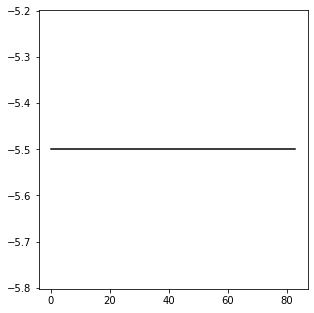

In [27]:
from scipy.signal import savgol_filter
# tweezer_counter = 0
for tweezer_counter in range(1):
    fig, ax = plt.subplots(1,1,  figsize=(5, 5))
    fig.tight_layout(pad=3, w_pad=3, h_pad=4.0)
        
    for probe_att_counter in range(1):
        y_data = shifted_pzt_paras[0,probe_att_counter,tweezer_counter,loop_start:loop_end]-np.array(pzt_para_list)[0]
        ax.plot(y_data,ls='-',color = 'black')
        
        
        
        

Now we're starting to see something!! ^^

In [28]:
with open('fit_dict_tweezer_att=7_mol_att=5.pkl', 'rb') as f:
    fit_dict = pickle.load(f)
    
    
    
print(fit_dict[f"tweezer_counter=0"])

mol_freq = 6
            

[array([597.76070663,   7.75038209]), array([[5.11901781e+01, 1.58321604e+00],
       [1.58321604e+00, 5.06121336e-02]])]


In [29]:
# For each tweezer and each probe_att, plot brightness vs mol_freq for every pzt_position. 
# GRID: tweezer X probe_att
# PLOT: brightness X mol_freq, diff pzt settings.
plot_true = False

stark_mag = 13.5
def stark_shift(cicero):
    return -210 + 2*(6.69*cicero+42.8)
int_mag = 0.0001
def func(x, a, center):
    return  a / (x-center)**2

ac_compensation = 0
cropped_loop_number = loop_end-loop_start

starkshift_const_freq = np.zeros((len( probe_att_list), len(tweezer_freq_list),len(pzt_para_list), num_loops))
sigma_starkshift_const_freq = np.zeros((len( probe_att_list), len(tweezer_freq_list),len(pzt_para_list), num_loops))


for probe_att, probe_att_counter in zip(probe_att_list[:], range(len(probe_att_list[:]))):

    for tweezer_freq, tweezer_counter in zip(tweezer_freq_list[:], range(len(tweezer_freq_list[:]))):
        print('__________________________')
        print(f'probe = {probe_att}, tw = {tweezer_freq}')
        if plot_true :
            fig, ax = plt.subplots(1,1,  figsize=(8, 6))
            ax.set_xlabel('AC Stark shift(MHz)')
            ax.set_ylabel('brightness(AU)')
            ax.set_title(f'probe_att={probe_att}, tw#={tweezer_freq_list[tweezer_counter]}')    
        for loop in range(loop_start, loop_end):
        
            mask = bg_brightness_mov_avg[loop] > 400
            popt, pcov = fit_dict[f"tweezer_counter={tweezer_counter}"]
            a_nocav, center_nocav = popt
            
            sigma_center_nocav = np.sqrt(pcov[1,1])
            sigma_a_nocav = np.sqrt(pcov[0,0])
            if plot_true :
                ax.plot(np.arange(-50,10,1),func(np.arange(-50,10,1), a_nocav, center_nocav), linestyle='-', c = 'black')
                   

            for pzt_counter in range(0, len(pzt_para_list)):
            
                colorratio = (shifted_pzt_para_simple[pzt_counter, loop]-\
                            np.min(shifted_pzt_para_simple))/\
                            (np.max(shifted_pzt_para_simple)-\
                            np.min(shifted_pzt_para_simple))
                color = colorsys.hsv_to_rgb(colorratio*0.8,1,1)      
                
                brightness_temp = int_mag * cav_brightness_mov_avg[pzt_counter, probe_att_counter, tweezer_counter, loop]
                

                sigma_brightness_temp = int_mag * cav_brightness_mov_sigma[pzt_counter, probe_att_counter, tweezer_counter, loop]

                starkshift_temp = - np.sqrt(a_nocav / brightness_temp) + center_nocav - stark_shift(mol_freq) + ac_compensation
#                     print(starkshift_temp)
                dBdS = 2*brightness_temp/np.sqrt(a_nocav / brightness_temp)
                sigma_starkshift_temp = sigma_brightness_temp / dBdS

                starkshift_const_freq[probe_att_counter, tweezer_counter, pzt_counter, loop] = \
                starkshift_temp
                sigma_starkshift_const_freq[probe_att_counter, tweezer_counter, pzt_counter, loop] = \
                sigma_starkshift_temp
                
                if plot_true == True :
                    if (loop%10 == 0):
                        ax.errorbar(stark_shift(mol_freq), brightness_temp, \
                        yerr = sigma_brightness_temp,  uplims=True, lolims=True, label= f'{pzt_para_list[pzt_counter]}_cav=2', linestyle='', color = color)
                        

        if plot_true == True :
            ax.set_ylim([0, 3*int_mag * np.amax(bg_brightness_mean)])

    #         ax.legend(title='pzt para', bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.tick_params(axis='y')
            plt.savefig(f'probe_att={probe_att}, tw#={tweezer_freq_list[tweezer_counter]}.png',dpi=1000)

__________________________
probe = 0.1, tw = 100


c:\python37-32\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


ValueError: cannot convert float NaN to integer

AC Stark shift found in above fits using brightness vs mol_freq data. Do this for every loop???? 

In [ ]:
# AC Stark shift vs z position for diff probe_att, all tweezers
# GRID: probe_att X 1 plot
# PLOT: AC Stark shift vs z position
# all 5 tweezers per plot
# z position scaled from pzt_para to z/780nm by hand using xmag
# stark shift calculated in the cell above (using fit from freq scan!)
import pickle
def func_cos(x, a, b, wavelength, phi):
    return b + a * np.cos(4*np.pi/wavelength*x + phi) 


contrast_guess = np.zeros((len(probe_att_list), len(tweezer_freq_list)))
contrast_fit =  np.zeros((len(probe_att_list), len(tweezer_freq_list)))
average_fit =  np.zeros((len(probe_att_list), len(tweezer_freq_list)))
wavelength_fit =  np.zeros((len(probe_att_list), len(tweezer_freq_list)))
sigma_contrast_fit =  np.zeros((len(probe_att_list), len(tweezer_freq_list)))
sigma_average_fit =  np.zeros((len(probe_att_list), len(tweezer_freq_list)))
sigma_wavelength_fit = np.zeros(( len(probe_att_list), len(tweezer_freq_list)))

x_mag = 2/7.5

for probe_att, probe_att_counter in zip(probe_att_list, range(len(probe_att_list))):

    fig, ax = plt.subplots(1, 1,  figsize=(5, 4))
    for tweezer_counter in range(len(tweezer_freq_list)):

#         mask = ~np.isnan(starkshift[probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten())

        mask = np.logical_and( \
                 starkshift_const_freq[probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()>-8,
                 sigma_starkshift_const_freq[probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()<9)
        popt, pcov = curve_fit(func_cos, shifted_pzt_para_simple[:, loop_start:loop_end].flatten()[mask], \
                               starkshift_const_freq[probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()[mask],\
#                                sigma = sigma_starkshift_const_freq[mol_freq_counter, probe_att_counter, tweezer_counter, :, loop_start:loop_end].flatten()[mask],\
                               p0=[1, 1, 7, 0], maxfev = 10000)
        a, b, wavelength, phi = popt
        sigma_a, sigma_b, sigma_wavelength, sigma_phi = np.sqrt(pcov.diagonal())
        contrast_fit[probe_att_counter, tweezer_counter] = np.abs(a/b)
        average_fit[probe_att_counter, tweezer_counter] = np.abs(b)
        wavelength_fit[probe_att_counter, tweezer_counter] = wavelength

        sigma_contrast_fit[probe_att_counter, tweezer_counter] = contrast_fit[probe_att_counter, tweezer_counter] * np.sqrt((sigma_a/a)**2 + (sigma_b/b)**2)
        sigma_average_fit[probe_att_counter, tweezer_counter] = sigma_b
        sigma_wavelength_fit[probe_att_counter, tweezer_counter] = sigma_wavelength

        xx = np.arange(5,10,0.1)
        yy = func_cos(xx,a,b,wavelength,phi)
        color = colorsys.hsv_to_rgb(tweezer_counter/len(tweezer_freq_list),1,1)

        if probe_att_counter == 0:
            output_dict = {}
            output_dict["pzt_pos"] = x_mag * (shifted_pzt_para_simple[:, loop_start:loop_end].flatten()[mask]-5)
            output_dict["stark_shift"] = starkshift_const_freq[probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()[mask]
            output_dict["sigma_stark_shift"] = sigma_starkshift_const_freq[probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()[mask]
            f = open(f"trap_starkshift_vs_z - tweezer{tweezer_freq_list[tweezer_counter]}.pkl","wb")
            pickle.dump(dict,f)
            f.close()

        ax.plot(x_mag * (xx-5),yy,'-', color = color)
        ax.set_xlabel('z/780 nm')
        ax.set_ylabel('AC Stark shift (MHz)')
        ax.set_title(f'probe_att={probe_att} - Constant Frequency Scan - mol_freq = 6')
    #     ax.set_title(f'tweezer nubmer={tweezer_freq_list[tweezer_counter]}')
        ax.errorbar(x_mag * (shifted_pzt_para_simple[:, loop_start:loop_end].flatten()[mask]-5),\
           starkshift_const_freq[ probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()[mask],\
#          yerr = y_mag * sigma_starkshift_const_freq[mol_freq_counter, probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()[mask],uplims=True, lolims=True, \
                                         label= f'tweezer{tweezer_freq_list[tweezer_counter]} - contrast = {np.abs(a/b):.2f}', color = color,ls='',marker = '.')
        ax.legend(title='tweezer frequency(Mhz)', bbox_to_anchor=(1.05, 1), loc='upper left')
#         contrast_guess[probe_att_counter, tweezer_counter] = (np.max(starkshift_const_freq[mol_freq_counter, probe_att_counter, tweezer_counter, :,:])-np.min(starkshift_const_freq[mol_freq_counter,probe_att_counter, tweezer_counter, :,:]))/\
#          (np.max(starkshift_const_freq[mol_freq_counter, probe_att_counter, tweezer_counter, :,:])+np.min(starkshift_const_freq[mol_freq_counter, probe_att_counter, tweezer_counter, :,:]))
        plt.savefig(f'Constant Frequency Scan - probe_att = {probe_att}- mol_freq = 6.png',dpi=1000)


In [ ]:
# import pickle
# output_dict = {}
# output_dict["tweezer_num"] = range(num_tweezers)
# output_dict["stark_shift_probe=0"] =average_fit[mol_freq_counter,0, :]*6.69
# output_dict["sigma_stark_shift_probe=0"] =sigma_average_fit[mol_freq_counter, 0, :]*6.69
# f = open("trap_starkshift_vs_r.pkl","wb")
# pickle.dump(dict,f)
# f.close()


fig, ax = plt.subplots(3,1,  figsize=(5,12))
fig.tight_layout(pad=3, w_pad=3, h_pad=4.0)
for probe_att, probe_att_counter in zip(probe_att_list, range(len(probe_att_list))):
    color = colorsys.hsv_to_rgb(probe_att_counter/len(probe_att_list),1,1)
    ax[0].set_xlabel('tweezer frequency (Mhz)')
    ax[0].set_ylabel('CONTRAST')
    ax[0].set_ylim([0,1])
    ax[0].set_title(f'contrast')
    # ax[0].plot(tweezer_freq_list[0:10], contrast_guess[0:10],label = 'contrast_guess')
    ax[0].errorbar(tweezer_freq_list, contrast_fit[probe_att_counter, :], \
                                         yerr = sigma_contrast_fit[probe_att_counter, :], \
                   label = f'{probe_att}',c=color, uplims=True, lolims=True)
    # ax[0].legend(title='fit_method', bbox_to_anchor=(1.05, 1), loc='upper left')

    ax[1].set_xlabel('tweezer frequency (Mhz)')
    ax[1].set_ylabel('AVERAGE AC STARK SHIFT(MHz)')
    ax[1].set_ylim([0,12])
    ax[1].set_title(f'average Stark shift')
    ax[1].errorbar(tweezer_freq_list[:], average_fit[probe_att_counter,:],\
                                         yerr = sigma_average_fit[probe_att_counter, :],\
                   label = f'{probe_att}',c=color, uplims=True, lolims=True)
    # ax[1].legend(title='fit_method', bbox_to_anchor=(1.05, 1), loc='upper left')


    ax[2].set_xlabel('tweezer frequency (Mhz)')
    ax[2].set_ylabel('FITTED WAVELENGTH (pixels)')
    ax[2].set_ylim([5,9])
    ax[2].set_title(f'wavelength')
    ax[2].errorbar(tweezer_freq_list[:], wavelength_fit[ probe_att_counter, :],\
                                         yerr = sigma_wavelength_fit[probe_att_counter, :],\
                   label = f'{probe_att}',c=color, uplims=True, lolims=True)
ax[0].legend(title='probe_att', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].legend(title='probe_att', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[2].legend(title='probe_att', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.savefig('Constant Frequency Scan - probe_att = {probe_att} - Tweezers0.png',dpi=1000)

In [ ]:
# AC Stark shift vs z position for diff probe_att, all tweezers
# GRID: probe_att X 1 plot
# PLOT: AC Stark shift vs z position
# all 5 tweezers per plot
# z position scaled from pzt_para to z/780nm by hand using xmag
# stark shift calculated in the cell above (using fit from freq scan!)

def func_cos(x, a, b, wavelength, phi):
    return b + a * np.cos(4*np.pi/wavelength*x + phi) 


contrast_guess = np.zeros((len(probe_att_list), len(tweezer_freq_list)))
contrast_fit =  np.zeros(( len(probe_att_list), len(tweezer_freq_list)))
average_fit =  np.zeros(( len(probe_att_list), len(tweezer_freq_list)))
wavelength_fit =  np.zeros(( len(probe_att_list), len(tweezer_freq_list)))
sigma_contrast_fit =  np.zeros(( len(probe_att_list), len(tweezer_freq_list)))
sigma_average_fit =  np.zeros(( len(probe_att_list), len(tweezer_freq_list)))
sigma_wavelength_fit = np.zeros(( len(probe_att_list), len(tweezer_freq_list)))
x_mag = 2/7.5

tweezer_select = [5,6,8,10]
for probe_att, probe_att_counter in zip(probe_att_list[1:], range(1,len(probe_att_list))):
    fig, ax = plt.subplots(1, len(tweezer_select),  figsize=(15, 4))
#         for tweezer_counter in range(len(tweezer_freq_list)):
    for tweezer_counter in range(num_tweezers):

#         mask = ~np.isnan(starkshift[probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten())

        mask = np.logical_and(np.logical_and(np.logical_and( \
                 starkshift_const_freq[ probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()>-8,
                 sigma_starkshift_const_freq[ probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()<9),
                 starkshift_const_freq[ 0 ,tweezer_counter, :, loop_start:loop_end].flatten()>-8),
                 sigma_starkshift_const_freq[ 0,tweezer_counter, :, loop_start:loop_end].flatten()<9)
#             print([mol_freq, probe_att_counter, tweezer_counter])
#             print(len(shifted_pzt_para_simple[:, loop_start:loop_end].flatten()[mask]))
        popt, pcov = curve_fit(func_cos, shifted_pzt_para_simple[:, loop_start:loop_end].flatten()[mask], \
                               starkshift_const_freq[ probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()[mask]\
                             - starkshift_const_freq[   0 ,tweezer_counter, :, loop_start:loop_end].flatten()[mask],\
#                                sigma = sigma_starkshift_const_freq[ probe_att_counter, tweezer_counter, :, loop_start:loop_end].flatten()[mask],\
                               p0=[-1, -1, 7, 0], maxfev = 10000)
        a, b, wavelength, phi = popt
        sigma_a, sigma_b, sigma_wavelength, sigma_phi = np.sqrt(pcov.diagonal())
#             print([tweezer_freq_list[tweezer_counter],b])
        contrast_fit[ probe_att_counter, tweezer_counter] = np.abs(a/b)
        average_fit[ probe_att_counter, tweezer_counter] = b
        wavelength_fit[ probe_att_counter, tweezer_counter] = wavelength

        sigma_contrast_fit[ probe_att_counter, tweezer_counter] = contrast_fit[ probe_att_counter, tweezer_counter] * np.sqrt((sigma_a/a)**2 + (sigma_b/b)**2)
        sigma_average_fit[ probe_att_counter, tweezer_counter] = sigma_b
        sigma_wavelength_fit[ probe_att_counter, tweezer_counter] = sigma_wavelength

        xx = np.arange(5,10,0.1)
        yy = func_cos(xx,a,b,wavelength,phi)
        color = colorsys.hsv_to_rgb(tweezer_counter/len(tweezer_freq_list),1,1)
        if tweezer_counter in set(tweezer_select):
            fig_counter = tweezer_select.index(tweezer_counter)
            ax[fig_counter].plot(x_mag * (xx-5),yy,'-', color = color)
            ax[fig_counter].set_xlabel('z/780 nm')
            ax[fig_counter].set_ylabel('AC Stark shift (MHz)')
            ax[fig_counter].set_title(f'probe_att={probe_att} - Constant Frequency Scan - mol_freq = 6 - tweezer{tweezer_freq_list[tweezer_counter]}')
        #     ax.set_title(f'tweezer nubmer={tweezer_freq_list[tweezer_counter]}')
            ax[fig_counter].errorbar(x_mag * (shifted_pzt_para_simple[:, loop_start:loop_end].flatten()[mask]-5),\
                                             (starkshift_const_freq[ probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()[mask]\
                                                      -starkshift_const_freq[0,tweezer_counter, :, loop_start:loop_end].flatten()[mask]),\
    #                                              yerr = y_mag * sigma_starkshift_const_freq[ probe_att_counter,tweezer_counter, :, loop_start:loop_end].flatten()[mask],uplims=True, lolims=True, \
                                             label= f'tweezer{tweezer_freq_list[tweezer_counter]} - contrast = {np.abs(a/b):.2f}', color = color,ls='',marker = '.')
#                 ax.legend(title='tweezer frequency(Mhz)', bbox_to_anchor=(1.05, 1), loc='upper left')
        #         contrast_guess[probe_att_counter, tweezer_counter] = (np.max(starkshift_const_freq[ probe_att_counter, tweezer_counter, :,:])-np.min(starkshift_const_freq[mol_freq_counter,probe_att_counter, tweezer_counter, :,:]))/\
        #          (np.max(starkshift_const_freq[ probe_att_counter, tweezer_counter, :,:])+np.min(starkshift_const_freq[ probe_att_counter, tweezer_counter, :,:]))
        plt.savefig(f'Constant Frequency Scan probe only- probe_att = {probe_att}- mol_freq = 6.png',dpi=200)


In [ ]:
# import pickle
#  = 2
# output_dict = {}
# output_dict["tweezer_num"] = range(num_tweezers)
# output_dict["stark_shift_probe=3"] =average_fit[1, :]*6.69
# output_dict["sigma_stark_shift_probe=3"] =sigma_average_fit[ 1, :]*6.69
# output_dict["stark_shift_probe=6"] =average_fit[2, :]*6.69
# output_dict["sigma_stark_shift_probe=6"] =sigma_average_fit[ 2, :]*6.69
# f = open("probe_starkshift_vs_r.pkl","wb")
# pickle.dump(dict,f)
# f.close()


fig, ax = plt.subplots(3,1,  figsize=(5,12))
fig.tight_layout(pad=3, w_pad=3, h_pad=4.0)
for probe_att, probe_att_counter in zip(probe_att_list, range(len(probe_att_list))):
    color = colorsys.hsv_to_rgb(probe_att_counter/len(probe_att_list),1,1)
    ax[0].set_xlabel('tweezer frequency (Mhz)')
    ax[0].set_ylabel('CONTRAST')
    ax[0].set_ylim([0, 2])
    ax[0].set_title(f'contrast - mol_freq = {mol_freq}')
    # ax[0].plot(tweezer_freq_list[0:10], contrast_guess[0:10],label = 'contrast_guess')
    ax[0].errorbar(tweezer_freq_list, contrast_fit[ probe_att_counter, :], \
                   yerr = sigma_contrast_fit[ probe_att_counter, :], \
                   label = f'{probe_att}',c=color, uplims=True, lolims=True)
    # ax[0].legend(title='fit_method', bbox_to_anchor=(1.05, 1), loc='upper left')

    ax[1].set_xlabel('tweezer frequency (Mhz)')
    ax[1].set_ylabel('AVERAGE AC STARK SHIFT(MHz)')
    ax[1].set_ylim([-10,1])
    ax[1].set_title(f'average Stark shift - mol_freq = {mol_freq}')
    ax[1].errorbar(tweezer_freq_list, average_fit[probe_att_counter, :],\
                   yerr = sigma_average_fit[ probe_att_counter, :],\
                   label = f'{probe_att}',c=color, uplims=True, lolims=True)
    # ax[1].legend(title='fit_method', bbox_to_anchor=(1.05, 1), loc='upper left')


    ax[2].set_xlabel('tweezer frequency (Mhz)')
    ax[2].set_ylabel('FITTED WAVELENGTH (pixels)')
    ax[2].set_ylim([3,11])
    ax[2].set_title(f'wavelength - mol_freq = {mol_freq}')
    ax[2].errorbar(tweezer_freq_list, wavelength_fit[probe_att_counter, :],\
                   yerr = sigma_wavelength_fit[ probe_att_counter, :],\
                   label = f'{probe_att}',c=color, uplims=True, lolims=True)
ax[0].legend(title='probe_att', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].legend(title='probe_att', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[2].legend(title='probe_att', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.savefig('Constant Frequency Scan probe only - mol_freq = {mol_freq}.png',dpi=300)